# 0. Setup and Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# 1. Load and explore the dataset

## Load the dataset

Download and load the diabetes dataset from kaggle, using pandas DataFrame.

In [ ]:
df = pd.read_csv('diabetes.csv')

## Data Exploration

Learn the dataset and its attributes.

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


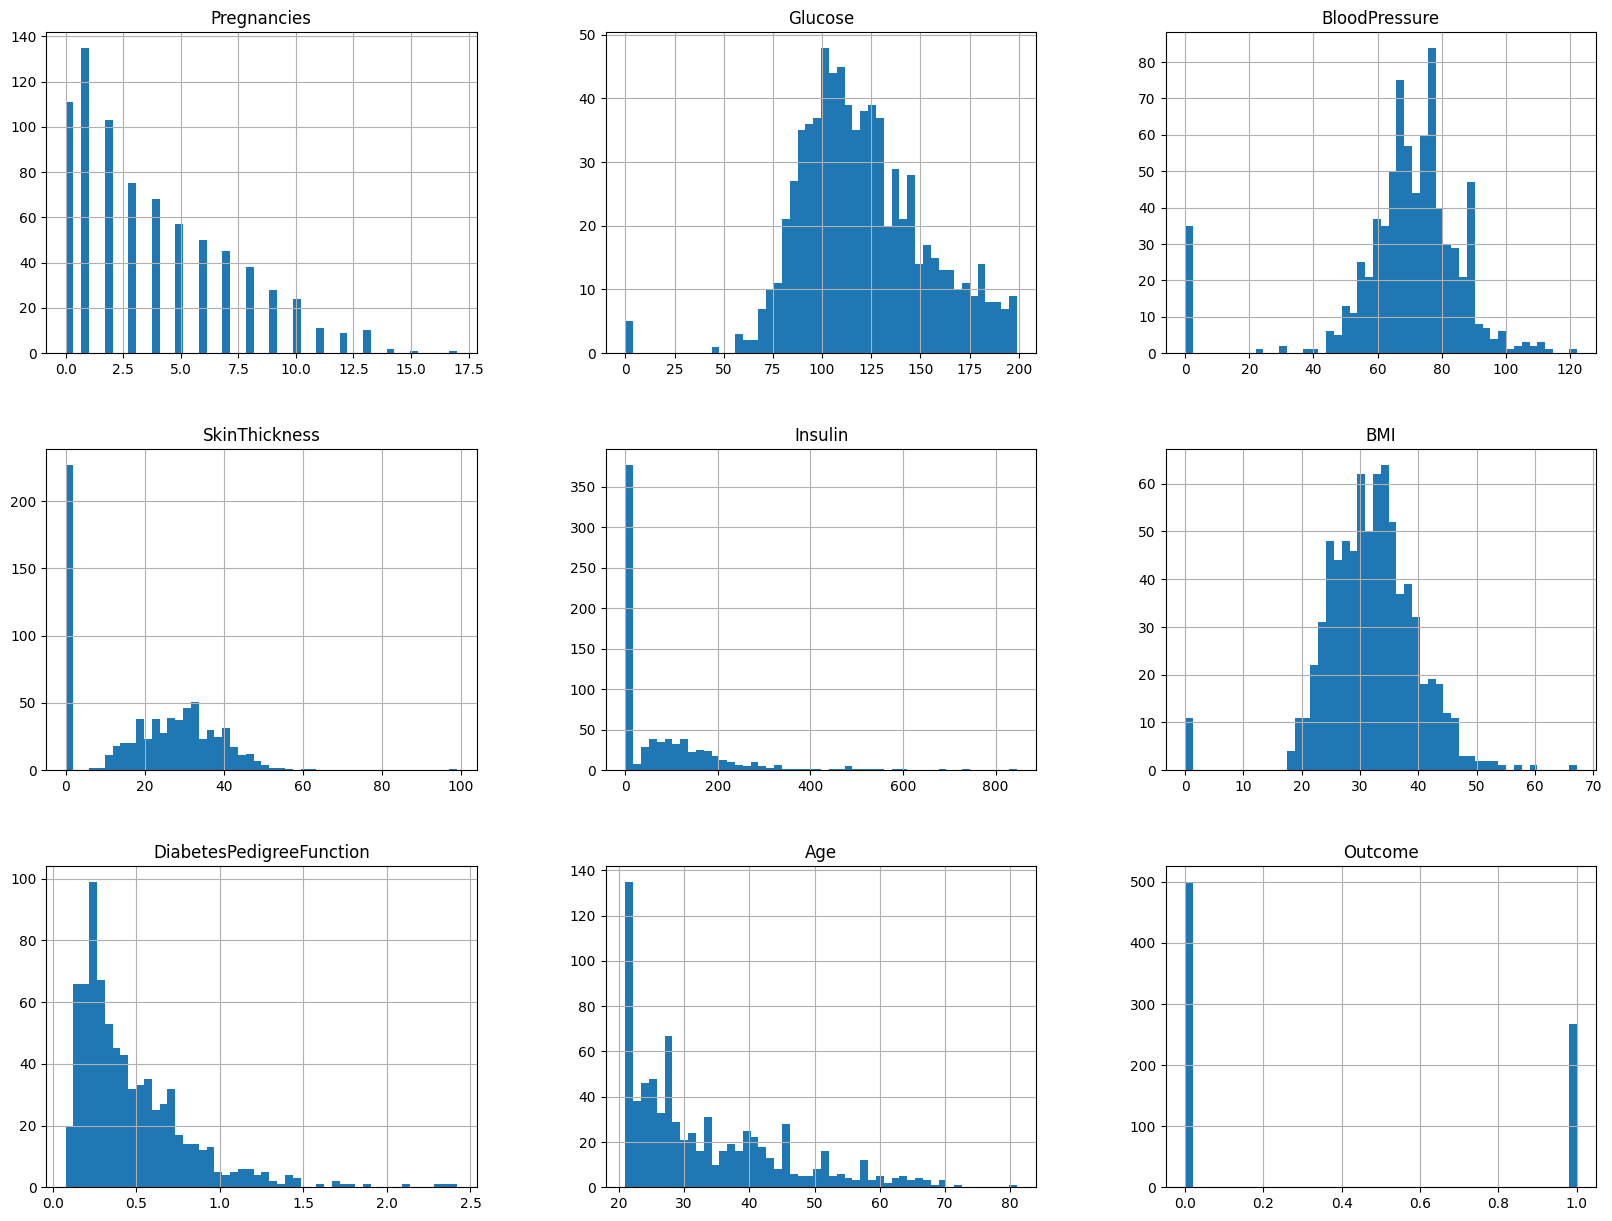

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Interesting to note that some columns have obviously missing data, we see big spikes on the graph for Glucose, BloodPressure, SkinThickness, Insulin, and BMI at values of 0, but these values do not make sense.

# 2. Prepare and Preprocess Data

## Data Cleaning - Imputer

As we saw when exploring the dataset, multiple columns have missing data that defaulted to the value 0. To fix this and make our models more accurate, we will use `SimpleImputer` from SciKitLearn to fill in this mssing values. This imputer basically just calculates the median of each attribute and applies that to each missing cell.



In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
df_temp = df.copy()
# Define the 5 columns we want to clean
cols_to_impute = ['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin']

# Turn the zeros of those columns into NaN values for the imputer
df_temp[cols_to_impute] = df_temp[cols_to_impute].replace(0, np.nan)

# Fit and transform the data with the imputer
df_temp[cols_to_impute] = imputer.fit_transform(df_temp[cols_to_impute])

In [ ]:
imputer.statistics_

array([117. ,  72. ,  32.3,  29. , 125. ])

In [ ]:
df_temp.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


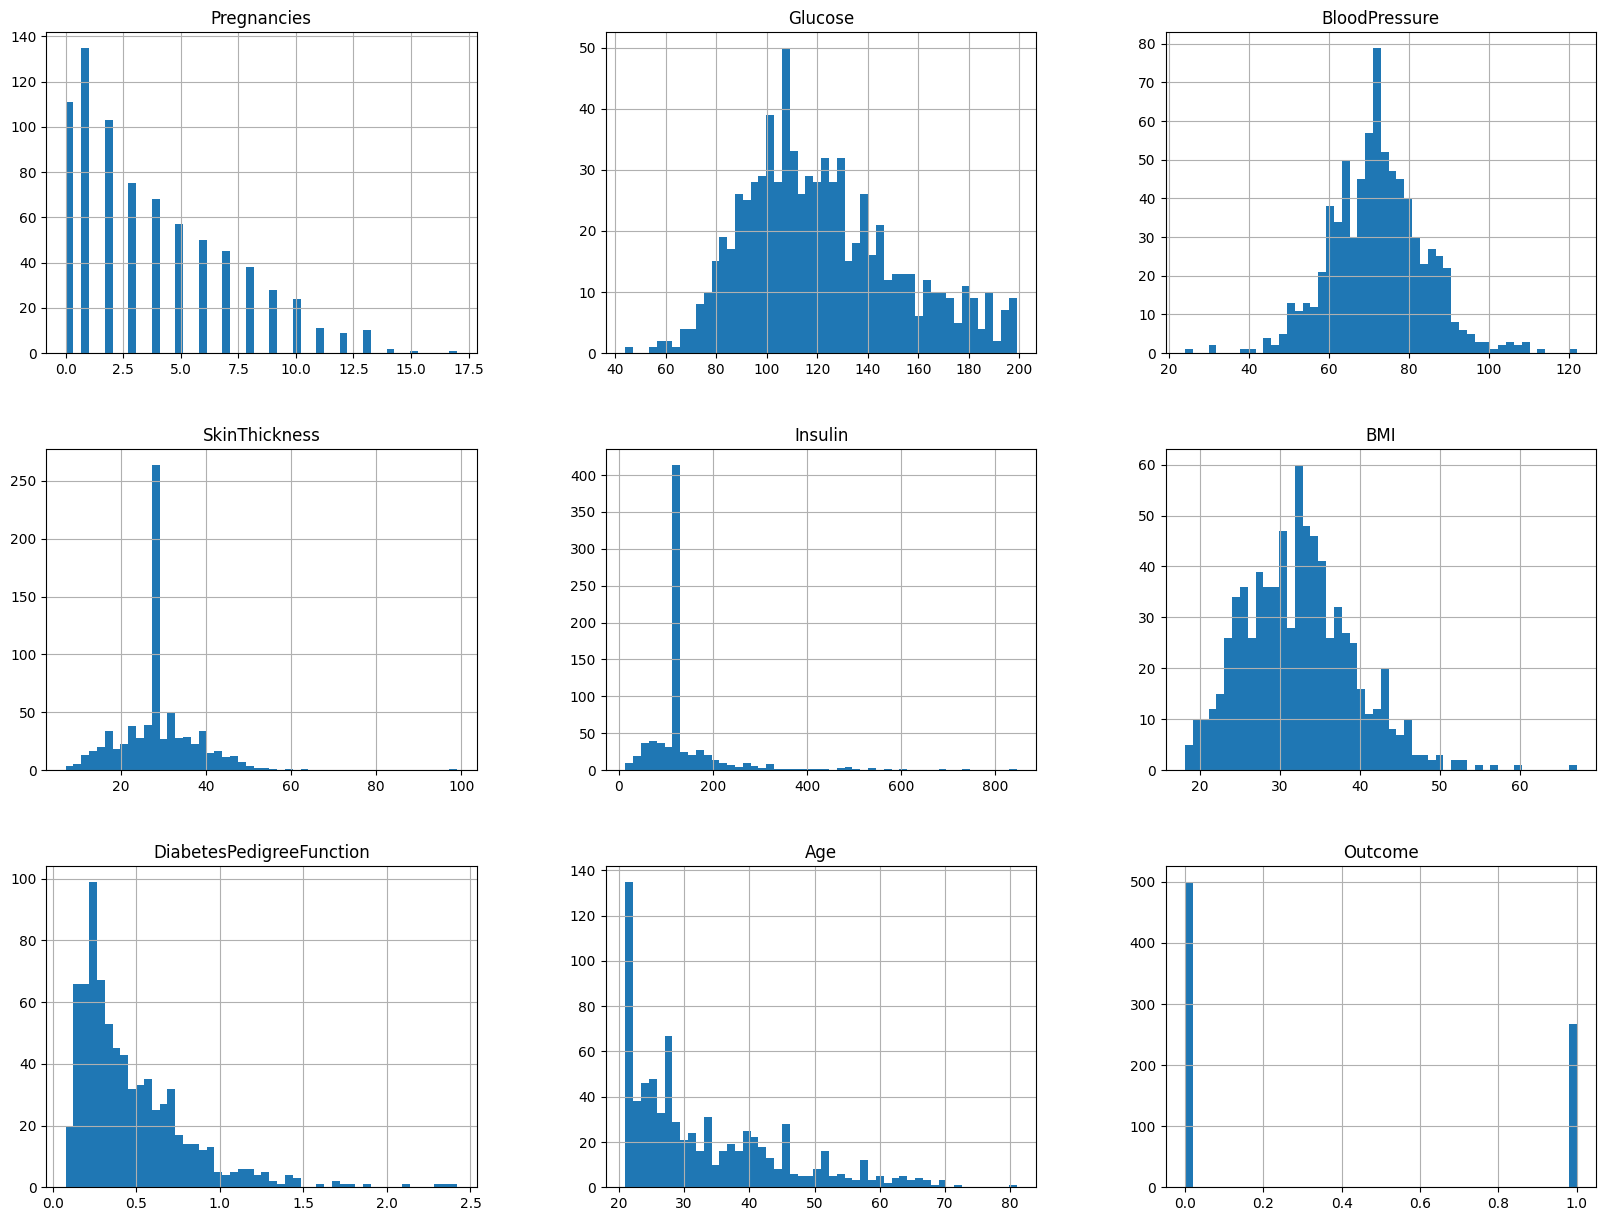

In [ ]:
df_temp.hist(bins=50, figsize=(20,15))
plt.show()

As we can see from the graph above, the imputer worked, and the zeros turned into medians. One thing to note is that in the SkinThickness and Insulin graphs, the spike at the median is pretty predominant, however, this is just because we didn't have a lot of data for those two columns.

## Final Cleaned Data Pipeline

Analyzing the data above and running multiple tests, I ultimately decided to drop the Insulin and SkinThickness columns from the training data. These columns are empty in over 50% of the dataset, so they won't be useful if we are just inferring their values using the imputer. Connecting this to the real world, these data points may be hard to obtain, so not including them in our models would be beneficial.

Additionally, we will remove any remaining samples that have zero's in the Glucose, BloodPressure, or BMI columns. The alternative for this would be to use the imputer, however, I found that simply removing these samples provides much better accuracy during testing.

In [ ]:
X = df.drop(['Insulin','SkinThickness'], axis=1)
# drop any sample with 0 values in these columns ['Glucose', 'BloodPressure', 'BMI']
X = X[(X['Glucose'] != 0) & (X['BloodPressure'] != 0) & (X['BMI'] != 0)]

y = X['Outcome'].copy()
X = X.drop('Outcome', axis=1)

X.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,32.467127,0.474765,33.350829
std,3.362803,30.750030,12.379870,6.888941,0.332315,11.765393
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,27.500000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,32.400000,0.379000,29.000000
75%,6.000000,142.000000,80.000000,36.600000,0.627500,41.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000


Split our data into training and test sets. We will use the test set to test the generalization of our model.

In [ ]:
from sklearn.model_selection import train_test_split

# split into training + test (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will also scale our data using `StandardScaler`, this is essential for machine learning algorithms such as K-NN.

In [ ]:
scaler = StandardScaler()

# Fit StandardScaler on training data
X_train_scaled = scaler.fit_transform(X_train)

# apply to test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# imputer code (not used)
# imputer = imputer = SimpleImputer(strategy="median")\

# X_train[cols_to_impute] = X_train[cols_to_impute].replace(0, np.nan)
# X_train[cols_to_impute] = imputer.fit_transform(X_train[cols_to_impute])

# X_test[cols_to_impute] = X_test[cols_to_impute].replace(0, np.nan)
# X_test[cols_to_impute] = imputer.transform(X_test[cols_to_impute])

Now, we are ready to train and evaluate some machine learning binary classification models!

# 3. Logistic Regression

First we will train and test a simpel Logistic Regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Use model to predict on test set.

In [ ]:
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

Display accuracy

In [ ]:
acc = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy: %.3f" % acc)

Accuracy: 0.793


In [ ]:
print(classification_report(y_test, y_pred_log_reg, digits=4))

              precision    recall  f1-score   support

           0     0.8462    0.8627    0.8544       102
           1     0.6585    0.6279    0.6429        43

    accuracy                         0.7931       145
   macro avg     0.7523    0.7453    0.7486       145
weighted avg     0.7905    0.7931    0.7916       145



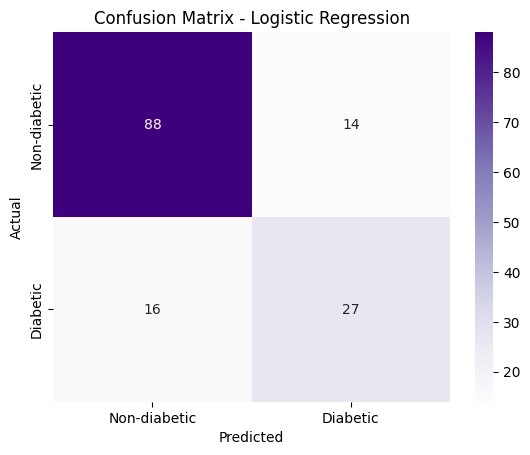

In [ ]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Purples', xticklabels=["Non-diabetic", "Diabetic"], yticklabels=["Non-diabetic", "Diabetic"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Here, we see our very basic logistic regression model was able to achieve 75.3% accuracy on the test set. The data has around 66% non diabetic samples, and 33% diabetic samples, so at least this model was able to perform better than that baseline. Hopefully we can improve with more sophisticated models.

# 4. SVM Classifier

Next, we will try an SVM classifier.


In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()

Since SVM has a lot of hyperparameters that we learned about in class, we will try a bunch of different combinations. We can do this with a grid search, using `GridSearchCV`, which uses cross validation to try all possible combinations in our parameter list, and gives us the best one found.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1,1,2,5,10,30,100],
    'C': [0.1,1,2,5,10,30,100]
}]

grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(grid_search.best_params_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [ ]:
svm_clf = grid_search.best_estimator_
y_pred_svm = svm_clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred_svm)
print("Accuracy: %.3f" % acc)

Accuracy: 0.800


In [ ]:
print(classification_report(y_test, y_pred_svm, digits=4))

              precision    recall  f1-score   support

           0     0.8476    0.8725    0.8599       102
           1     0.6750    0.6279    0.6506        43

    accuracy                         0.8000       145
   macro avg     0.7613    0.7502    0.7553       145
weighted avg     0.7964    0.8000    0.7978       145



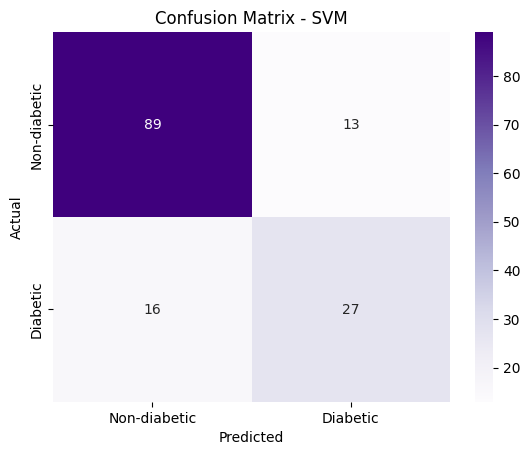

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', xticklabels=["Non-diabetic", "Diabetic"], yticklabels=["Non-diabetic", "Diabetic"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# 5. K-Nearest Neighbors (KNN)

Here we will try KNN from lecture. We will try k values 1 to 20 on the training data. Using cross validation, we will choose the best model.

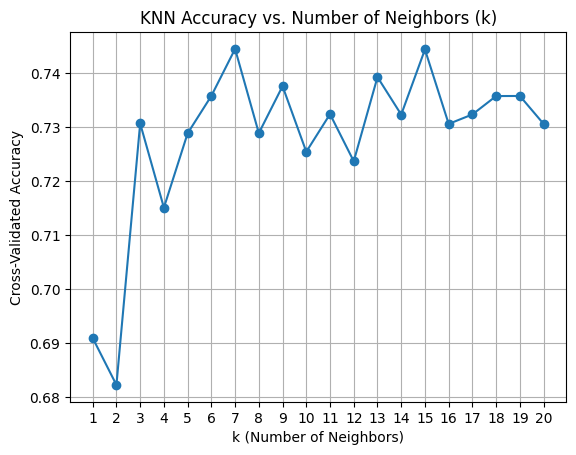

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    accuracies.append(scores.mean())

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs. Number of Neighbors (k)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Based on these values, I'm going to choose K=9 for the final K-NN model. There is a noticable fall-off in improvement after K=9, even though some of the higher values produce better scores.

In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=7)
knn_final.fit(X_train_scaled, y_train)

y_pred_knn = knn_final.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred_knn)
print("Accuracy: %.3f" % acc)

Accuracy: 0.786


In [ ]:
print(classification_report(y_test, y_pred_knn, digits=4))

              precision    recall  f1-score   support

           0     0.8660    0.8235    0.8442       102
           1     0.6250    0.6977    0.6593        43

    accuracy                         0.7862       145
   macro avg     0.7455    0.7606    0.7518       145
weighted avg     0.7945    0.7862    0.7894       145



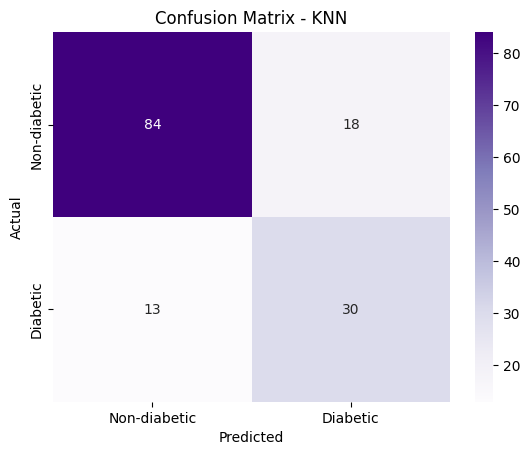

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', xticklabels=["Non-diabetic", "Diabetic"], yticklabels=["Non-diabetic", "Diabetic"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

# 6. Neural Network Classifier (MLP Classifier)

Finally, we will try to implement a neural network. To keep it simple, we will use MLPClassifier.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(200,), max_iter=500, random_state=42)
mlp_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(200,), max_iter=500, random_state=42)

In [ ]:
y_pred_mlp = mlp_clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred_mlp)
print("Accuracy: %.3f" % acc)

Accuracy: 0.793


In [ ]:
print(classification_report(y_test, y_pred_mlp, digits=4))

              precision    recall  f1-score   support

           0     0.8529    0.8529    0.8529       102
           1     0.6512    0.6512    0.6512        43

    accuracy                         0.7931       145
   macro avg     0.7521    0.7521    0.7521       145
weighted avg     0.7931    0.7931    0.7931       145



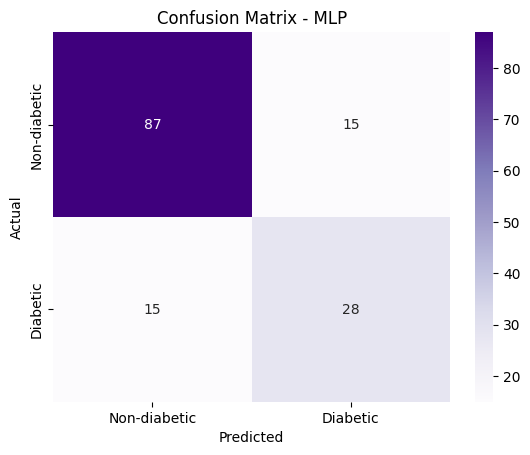

In [ ]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Purples', xticklabels=["Non-diabetic", "Diabetic"], yticklabels=["Non-diabetic", "Diabetic"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.show()